Phần 1 - Chuẩn bị phân tích dữ liệu


In [74]:
#Load thư viện
import pandas as pd
import numpy as np

In [75]:
#Đọc file csv
df = pd.read_csv("S2_DataFile(2).csv")

In [76]:
#Hiển thị 5 dòng đầu tiên
df.head(5)

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,12/01/2019 1:11
1,BR0002,ATM,2001100,CASH TRANSACTIONS,12/01/2019 11:01
2,BR0004,MOBILE,2140140,BOOKING ORDER,12/01/2019 1:11
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,12/01/2019 6:50
4,BR0003,MOBILE,3046430,BOOKING ORDER,12/01/2019 1:11


Phần 2 - Tiến trình xử lý dữ liệu

Kiểm tra kiểu dữ liệu

In [77]:
#Kiểm tra dữ liệu TRAN_TYPE
print(df['TRAN_TYPE'].dtypes)

object


In [78]:
#Convert về dạng DateTime
df['TRAN_TIME'] = pd.to_datetime(df['TRAN_TIME'],format='%d/%m/%Y %H:%M')

In kiểu dữ liệu

In [79]:
#In kiểu dữ liệu
print(df['TRAN_TIME'].dtype)

datetime64[ns]


In [80]:
print(df['AMOUNT'].dtype)

int64


In [81]:
#Check tổng quan dữ liệu
print(df['AMOUNT'].describe())

count    5.000000e+02
mean     3.529194e+06
std      1.602360e+07
min     -2.000000e+06
25%      7.883650e+04
50%      1.002200e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [82]:
#Tạo mask để lấy các bản ghi hợp lệ
mask = df['AMOUNT'] > 0

In [83]:
#Lấy các bản ghi không lỗi
df = df[mask]

TẠO RA CÁC CỘT DỮ LIỆU MỚI

In [84]:
#Tạo cột giờ
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')

In [85]:
#Kiểm tra thử
print(df[['TRAN_HOUR','TRAN_TIME']])

    TRAN_HOUR           TRAN_TIME
0          01 2019-01-12 01:11:00
1          11 2019-01-12 11:01:00
2          01 2019-01-12 01:11:00
3          06 2019-01-12 06:50:00
4          01 2019-01-12 01:11:00
..        ...                 ...
495        08 2019-01-12 08:45:00
496        21 2019-04-11 21:13:00
497        10 2019-01-12 10:53:00
498        08 2019-01-12 08:58:00
499        09 2019-01-12 09:13:00

[498 rows x 2 columns]


Phần 3 - Phân tích dữ liệu và biểu diễn dữ liệu

B I Ể U Đ Ồ P I E V Ề T Ỷ L Ệ S Ô T I Ề N G I A O D Ị C H 
T R Ê N C Á C K Ê N H

  CHANNEL_ID  SUM_AMT_BY_CHN
0        ATM       179502250
1   INTERNET       768629241
2     MOBILE       818465352
            SUM_AMT_BY_CHN
CHANNEL_ID                
ATM              179502250
INTERNET         768629241
MOBILE           818465352


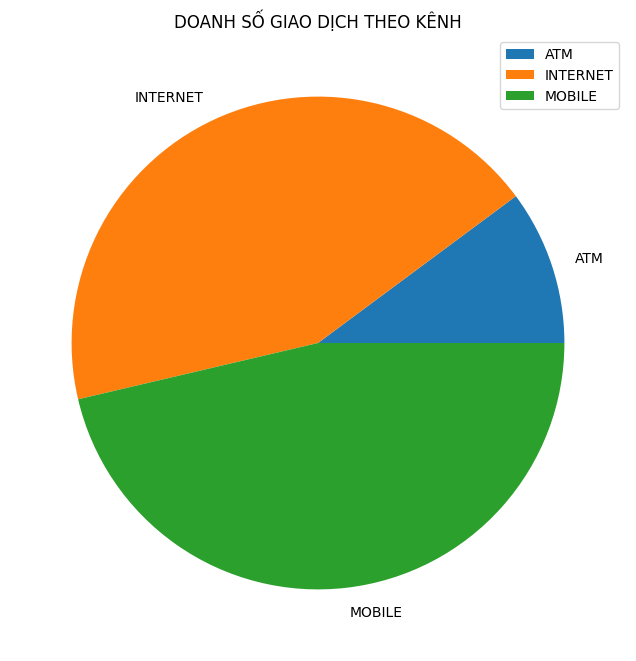

In [86]:
#Thực hiện group by channel và tính tổng số tiền giao dịch
sum_AMT_byChannel = df.groupby(['CHANNEL_ID'])['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHN')
print(sum_AMT_byChannel)
df_plot = sum_AMT_byChannel
df_plot = df_plot.set_index('CHANNEL_ID')
print(df_plot)
plot = df_plot.plot.pie(y='SUM_AMT_BY_CHN',subplots = True, figsize=(8, 8))
#Trang trí và hiển thị biểu đồ
plt.title("DOANH SỐ GIAO DỊCH THEO KÊNH")
plt.ylabel("")
plt.show()

B I Ể U Đ Ồ 2 . B I Ể U Đ Ồ C Ộ T V Ề S Ố L Ư Ợ N G V À D O A N H S Ố 
G I A O D Ị C H T H E O K Ê N H

  CHANNEL_ID  COUNTS
0        ATM      98
1   INTERNET      72
2     MOBILE     328
  CHANNEL_ID  SUM_AMT_BY_CHN  COUNTS
0        ATM       179502250      98
1   INTERNET       768629241      72
2     MOBILE       818465352     328
            SUM_AMT_BY_CHN  COUNTS
CHANNEL_ID                        
ATM              179502250      98
INTERNET         768629241      72
MOBILE           818465352     328
            SUM_AMT_BY_CHN  COUNTS   %_DOANHSO   %_SOLUONG
CHANNEL_ID                                                
ATM              179502250      98   21.931564   29.878049
INTERNET         768629241      72   93.911030   21.951220
MOBILE           818465352     328  100.000000  100.000000


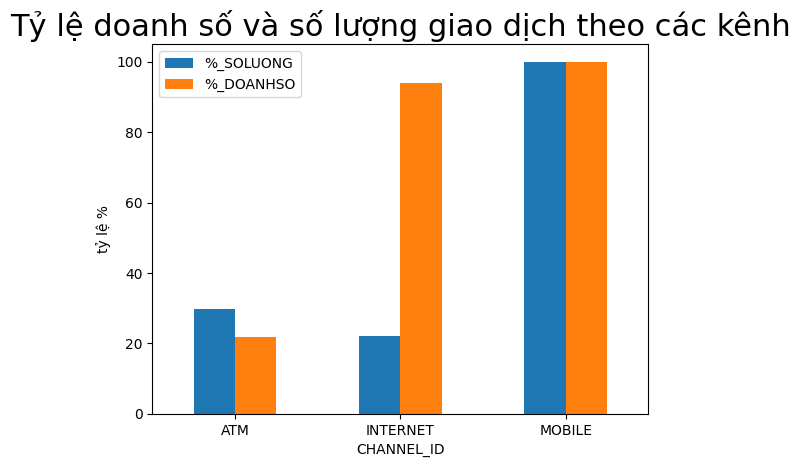

In [87]:
#Vẽ biểu đồ danh doanh số và số lượng giao dịch trên các kênh giao dịch
count_byChannel = df.groupby(['CHANNEL_ID']).size().reset_index(name='COUNTS')
print(count_byChannel)
df_plot2 = sum_AMT_byChannel.merge(count_byChannel, on=['CHANNEL_ID'])
print(df_plot2)
df_plot2 = df_plot2.set_index('CHANNEL_ID')
print(df_plot2)
# Quy đổi dữ liệu Doanh số về phần trăm để biểu diễn tính tương quan của dữ liệu
max_amt = df_plot2['SUM_AMT_BY_CHN'].max()
df_plot2['%_DOANHSO'] =df_plot2['SUM_AMT_BY_CHN']*100/max_amt
# Quy đổi dữ liệu Số lượng giao dịch về phần trăm để biểu diễn tính tương quan của dữ liệu
max_count = df_plot2['COUNTS'].max()
df_plot2['%_SOLUONG'] = df_plot2['COUNTS'] * 100 / max_count
print(df_plot2)
df_plot2.plot.bar( y=['%_SOLUONG','%_DOANHSO'])
plt.title("Tỷ lệ doanh số và số lượng giao dịch theo các kênh", fontsize=22)
plt.ylabel('tỷ lệ %')
plt.xticks(rotation=0)
plt.show()

B I Ể U Đ Ồ 3 . S Ố L I Ệ U G I A O D Ị C H T R U N G B Ì N H T R O N G 
TỪNG G I Ờ T R O N G N G À Y

In [88]:
#Vẽ biểu đồ lưu lượng giao dịch các kênh trung bình theo giờ mỗi ngày
# Tính số ngày trong dữ liệu
number_of_days = (df['TRAN_TIME'].max().date() - df['TRAN_TIME'].min().date()).days
print(number_of_days)

89


In [89]:
# Trích ra 2 cột kênh và giờ
df = df[['CHANNEL_ID', 'TRAN_HOUR']]

In [90]:
# Group và tính số lượng từng kênh trong từng giờ
count_by_CNNTime = df.groupby(['CHANNEL_ID','TRAN_HOUR']).size().reset_index(name='COUNTS_CNNTIME')

In [91]:
# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', 
index=['TRAN_HOUR'], columns=['CHANNEL_ID'])

In [92]:
# Xử lý NaN
df_plot3['ATM'] = df_plot3['ATM'].fillna(0)
df_plot3['INTERNET'] = df_plot3['INTERNET'].fillna(0)
df_plot3['MOBILE'] = df_plot3['MOBILE'].fillna(0)

In [93]:
# Tính giá trị trung bình theo ngày
df_plot3['ATM'] = df_plot3['ATM'] / number_of_days
df_plot3['INTERNET'] = df_plot3['INTERNET'] / number_of_days
df_plot3['MOBILE'] = df_plot3['MOBILE'] / number_of_days

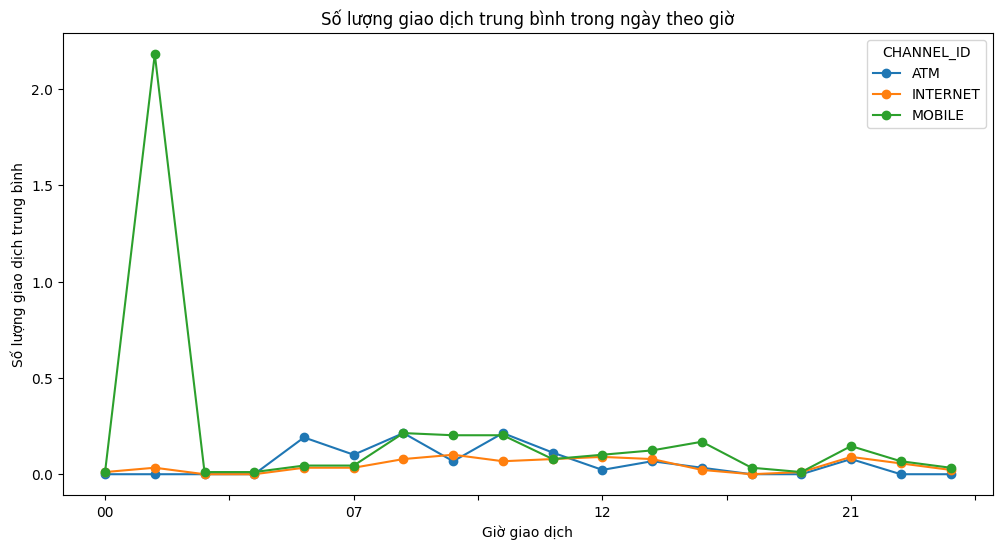

In [94]:
# Vẽ biểu đồ
df_plot3.plot(y=['ATM', 'INTERNET', 'MOBILE'], figsize=(12, 6),marker='o')
plt.title('Số lượng giao dịch trung bình trong ngày theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')
plt.show()

Phần 4 - Kết luận